In [4]:
!pip install mlxtend
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [5]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format='retina'
mpl.font_manager.fontManager.addfont('/content/thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')
mpl.rcParams.update({'font.size': 6})

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
path = '/content/gdrive/MyDrive/BAD7105-CRM-Analytics/HW03 Cross-selling models/Customer Preference Survey (Responses).xlsx'
df = pd.read_excel(path)
df.head()

,Timestamp,playstation5,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,Kindle,เครื่องซักผ้า,Bluetooth Speaker,ห้องน้ำแมวอัตโนมัติ,PS5,ทรายแมว,ลำโพง pixel,Logitech Mx Master 3 Mouse,ตุ๊กตา ty,น้ำพุแมว,Robot ดูดฝุ่น,Mechanical keyboard,Nintendo switch,หนังสือ python,gaming chair,Deskmat,Dew - ไฟโรเซ่,เทียนหอม jo malone,กระติกน้ำ 2 ลิตร,ที่นอน memory form,พลาสเตอร์บรรเทาปวด ตราเสือ,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด
0,2021-10-17 17:29:58.741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-10-17 17:43:37.985,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
2,2021-10-17 17:43:40.565,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,เคย,ไม่เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
3,2021-10-17 17:43:46.302,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,เคย,ไม่เคย,เคย,เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ
4,2021-10-17 17:43:48.912,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคย,เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Timestamp                      48 non-null     datetime64[ns]
 1   playstation5                   47 non-null     object        
 2   เครื่องทำขนมปัง                47 non-null     object        
 3   Ergonomic Wrist Rest           47 non-null     object        
 4   เครื่องอบผ้า                   47 non-null     object        
 5   เครื่องชงกาแฟแคปซูล            47 non-null     object        
 6   เก้าอี้ LA-Z-Boy               47 non-null     object        
 7   เครื่องให้อาหารสัตว์อัตโนมัติ  47 non-null     object        
 8   บัตตาเลี่ยน                    46 non-null     object        
 9   แก้วเก็บความเย็น               47 non-null     object        
 10  ลู่วิ่งออกกำลังกาย             47 non-null     object        
 11  Kindle               

In [9]:
df.dropna(inplace=True)
df.drop(columns=['Timestamp','PS5'],axis=1,inplace=True)

In [10]:
df.columns

Index(['playstation5', 'เครื่องทำขนมปัง', 'Ergonomic Wrist Rest',
       'เครื่องอบผ้า', 'เครื่องชงกาแฟแคปซูล', 'เก้าอี้ LA-Z-Boy',
       'เครื่องให้อาหารสัตว์อัตโนมัติ', 'บัตตาเลี่ยน', 'แก้วเก็บความเย็น',
       'ลู่วิ่งออกกำลังกาย', 'Kindle', 'เครื่องซักผ้า', 'Bluetooth Speaker',
       'ห้องน้ำแมวอัตโนมัติ', 'ทรายแมว', 'ลำโพง pixel',
       'Logitech Mx Master 3 Mouse', 'ตุ๊กตา ty', 'น้ำพุแมว', 'Robot ดูดฝุ่น',
       'Mechanical keyboard', 'Nintendo switch', 'หนังสือ python',
       'gaming chair', 'Deskmat', 'Dew - ไฟโรเซ่', 'เทียนหอม jo malone',
       'กระติกน้ำ 2 ลิตร', 'ที่นอน memory form', 'พลาสเตอร์บรรเทาปวด ตราเสือ',
       'การ์ดจอ RTX 3080', 'ขนมจีนน้ำยาปู', 'Salmon Sashimi',
       'จักรยานเสือหมอบ', 'ไฟแต่งห้องมินิมอล', 'External Harddisk',
       'หม้อทอดไร้น้ํามัน', 'airpods ', 'ยาดม', 'ไฟส่องหน้าไลฟ์สด'],
      dtype='object')

In [11]:
column_values = df[df.columns].values.ravel()
unique_values =  pd.unique(column_values)
unique_values

array(['ไม่เคยซื้อ', 'ไม่เคย', 'เคยซื้อ', 'ไม่', 'ไม่เคยซือ', 'เคย'],
      dtype=object)

In [12]:
df.replace(['เคยซื้อ','เคย'],1,inplace=True)
df.replace(['ไม่เคยซื้อ','ไม่เคย','ไม่','ไม่เคยซือ'],0,inplace=True)

In [13]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
frequent_itemsets.sort_values(by='support',ascending=False)

,support,itemsets
7,0.829268,(Salmon Sashimi)
10,0.829268,(ยาดม)
8,0.804878,(External Harddisk)
0,0.756098,(แก้วเก็บความเย็น)
24,0.731707,"(Salmon Sashimi, ยาดม)"
2,0.707317,(Bluetooth Speaker)
26,0.658537,"(External Harddisk, ยาดม)"
23,0.658537,"(Salmon Sashimi, External Harddisk)"
15,0.634146,"(แก้วเก็บความเย็น, ยาดม)"
18,0.634146,"(Bluetooth Speaker, ยาดม)"


In [15]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(แก้วเก็บความเย็น),(Bluetooth Speaker),0.756098,0.707317,0.536585,0.709677,1.003337,0.001785,1.008130
1,(Bluetooth Speaker),(แก้วเก็บความเย็น),0.707317,0.756098,0.536585,0.758621,1.003337,0.001785,1.010453
2,(แก้วเก็บความเย็น),(External Harddisk),0.756098,0.804878,0.609756,0.806452,1.001955,0.001190,1.008130
3,(External Harddisk),(แก้วเก็บความเย็น),0.804878,0.756098,0.609756,0.757576,1.001955,0.001190,1.006098
4,(แก้วเก็บความเย็น),(หม้อทอดไร้น้ํามัน),0.756098,0.609756,0.536585,0.709677,1.163871,0.075550,1.344173
5,(หม้อทอดไร้น้ํามัน),(แก้วเก็บความเย็น),0.609756,0.756098,0.536585,0.880000,1.163871,0.075550,2.032520
6,(แก้วเก็บความเย็น),(ยาดม),0.756098,0.829268,0.634146,0.838710,1.011385,0.007139,1.058537
7,(ยาดม),(แก้วเก็บความเย็น),0.829268,0.756098,0.634146,0.764706,1.011385,0.007139,1.036585
8,(External Harddisk),(Bluetooth Speaker),0.804878,0.707317,0.585366,0.727273,1.028213,0.016062,1.073171
9,(Bluetooth Speaker),(External Harddisk),0.707317,0.804878,0.585366,0.827586,1.028213,0.016062,1.131707


In [16]:
rules[(rules['lift'] >= 1) & (rules['confidence'] >= 0.7)].head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(แก้วเก็บความเย็น),(Bluetooth Speaker),0.756098,0.707317,0.536585,0.709677,1.003337,0.001785,1.008130
1,(Bluetooth Speaker),(แก้วเก็บความเย็น),0.707317,0.756098,0.536585,0.758621,1.003337,0.001785,1.010453
2,(แก้วเก็บความเย็น),(External Harddisk),0.756098,0.804878,0.609756,0.806452,1.001955,0.001190,1.008130
3,(External Harddisk),(แก้วเก็บความเย็น),0.804878,0.756098,0.609756,0.757576,1.001955,0.001190,1.006098
4,(แก้วเก็บความเย็น),(หม้อทอดไร้น้ํามัน),0.756098,0.609756,0.536585,0.709677,1.163871,0.075550,1.344173
5,(หม้อทอดไร้น้ํามัน),(แก้วเก็บความเย็น),0.609756,0.756098,0.536585,0.880000,1.163871,0.075550,2.032520
6,(แก้วเก็บความเย็น),(ยาดม),0.756098,0.829268,0.634146,0.838710,1.011385,0.007139,1.058537
7,(ยาดม),(แก้วเก็บความเย็น),0.829268,0.756098,0.634146,0.764706,1.011385,0.007139,1.036585
8,(External Harddisk),(Bluetooth Speaker),0.804878,0.707317,0.585366,0.727273,1.028213,0.016062,1.073171
9,(Bluetooth Speaker),(External Harddisk),0.707317,0.804878,0.585366,0.827586,1.028213,0.016062,1.131707


#SUMMARY

เมื่อคนซื้อหม้อทอดไร้น้ำมัน ก็มักจะซื้อแก้วเก็บความเย็นด้วย
โดย support=0.525 ,confidence=0.875, lift=1.167

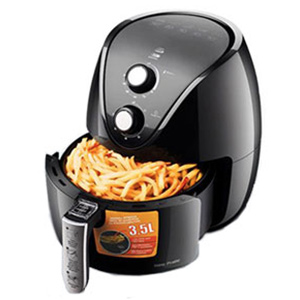 >>  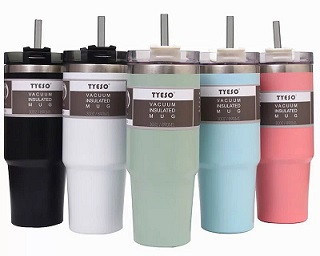